# Mass Analysis

This document is a stream-of-thought analysis of the results of a ~4 hour operation to run every
centrality measure sorting on every one of 18 repositories available to me. The data has been saved
to a file `data/results.pkl.gz` in the format of a list of tuples.

## Important: Settings!

You can change what this notebook will analyze and visualize here.

In [54]:
team_name = "C20-TeamS"
rank_length_limit = 15

## Data loading, cleaning

In [55]:
import itertools
import pickle
import pandas as pd
import seaborn as sns
from typing import List, Tuple, Dict

results: List[Tuple] # useful for autocomplete, don't judge me
filename = "data/results.pkl.gz"
with open(filename, "rb") as file:
    results = pickle.load(file)
print("Loaded {} results from {}".format(len(results), filename))

Loaded 360 results from data/results.pkl.gz


The error handler defaults to returning an empty result if any exception was encountered, so print stats on those
and filter them out.

In [56]:
print("{} results are empty due to exceptions during processing".format(results.count(())))
results = list(filter(lambda result: len(result) != 0, results))

128 results are empty due to exceptions during processing


Clean the data by splitting tuples in the rank lists as needed and assembling all the three-tuple job results into
a pandas dictionary with a multi-level index.

In [57]:
# Organize by team first, then map algorithms to the ranked nodes
results_cleaned: Dict[Tuple[str, str], List[str]] = {}
for job_result in results:
    team = job_result[0].split("/")[2]
    algo_name = job_result[1]

    # Limit to top rank_length_limit values and de-tuple rank entries as needed
    ranking = list(job_result[2])[:rank_length_limit]
    if type(ranking[0]) is tuple:
        ranking = [item[0] for item in ranking]

    results_cleaned[(team, algo_name)] = ranking

df = pd.DataFrame(results_cleaned)
df

C20-TeamR  \
                                               degree   
0                                          marzpuente   
1                                              crayhj   
2                                           xchen0326   
3                                                 Ian   
4                                     Russell DeSousa   
5                                          17craigiec   
6                                         jiananli306   
7                                       RussellSchool   
8                                           AstroSeer   
9                                   Jeffrey Jiyang Wu   
10  src/main/java/edu/wpi/cs3733/c20/teamr/boundry...   
11  src/main/java/edu/wpi/cs3733/c20/teamr/boundry...   
12  src/main/resources/edu/wpi/cs3733/c20/teamr/bo...   
13  src/main/resources/edu/wpi/cs3733/c20/teamr/bo...   
14           src/main/java/boundry/AppController.java   

                                                       \
                                             pagerank   
0                                          marzpuente   
1                                              crayhj   
2                                         jiananli306   
3                                           xchen0326   
4                                          17craigiec   
5                                     Russell DeSousa   
6                                                 Ian   
7                                       RussellSchool   
8                                           AstroSeer   
9                                   Jeffrey Jiyang Wu   
10  src/main/java/edu/wpi/cs3733/c20/teamr/boundry...   
11  src/main/java/edu/wpi/cs3733/c20/teamr/boundry...   
12  src/main/resources/edu/wpi/cs3733/c20/teamr/bo...   
13  src/main/resources/edu/wpi/cs3733/c20/teamr/ht...   
14  src/main/java/edu/wpi/cs3733/c20/teamr/boundry...   

                                                       \
                                            closeness   
0   src/main/java/edu/wpi/cs3733/c20/teamr/boundry...   
1   src/main/java/edu/wpi/cs3733/c20/teamr/boundry...   
2   src/main/resources/edu/wpi/cs3733/c20/teamr/bo...   
3   src/main/resources/edu/wpi/cs3733/c20/teamr/bo...   
4                                        build.gradle   
5   src/main/java/edu/wpi/cs3733/c20/teamr/boundry...   
6            src/main/java/boundry/AppController.java   
7   src/main/resources/edu/wpi/cs3733/c20/teamr/bo...   
8   src/main/java/edu/wpi/cs3733/c20/teamr/boundry...   
9   src/main/resources/edu/wpi/cs3733/c20/teamr/ht...   
10   src/main/java/edu/wpi/cs3733/c20/teamr/Main.java   
11                                         marzpuente   
12  src/main/resources/edu/wpi/cs3733/c20/teamr/ht...   
13  src/main/resources/edu/wpi/cs3733/c20/teamr/bo...   
14  src/main/resources/edu/wpi/cs3733/c20/teamr/bo...   

                                                       \
                                             subgraph   
0                                          marzpuente   
1                                              crayhj   
2                                           xchen0326   
3                                     Russell DeSousa   
4                                                 Ian   
5                                          17craigiec   
6                                         jiananli306   
7                                       RussellSchool   
8                                           AstroSeer   
9   src/main/java/edu/wpi/cs3733/c20/teamr/boundry...   
10  src/main/java/edu/wpi/cs3733/c20/teamr/boundry...   
11  src/main/resources/edu/wpi/cs3733/c20/teamr/bo...   
12  src/main/resources/edu/wpi/cs3733/c20/teamr/bo...   
13                                       build.gradle   
14  src/main/resources/edu/wpi/cs3733/c20/teamr/ht...   

                                                       \
                              subgraph_centrality_exp   
0                                          marzpue

Now that we have the data in a dataframe, analysis gets a little easier. We can easily query for a single team's results
across all algorithms, for instance.

In [58]:
df[team_name]

,pagerank,degree,closeness,information,current_flow_closeness,betweenness,betweenness_source,subgraph,betweenness_current_flow,subgraph_centrality_exp,betweenness_edge,harmonic,edge_current_flow_betweenness,load,communicability
0,Newell Clark,Newell Clark,src/main/java/edu/wpi/cs3733/c20/teamS/Editing...,Newell Clark,Newell Clark,Newell Clark,Newell Clark,Newell Clark,Newell Clark,Newell Clark,Newell Clark,Newell Clark,src/main/java/edu/wpi/cs3733/c20/teamS/Editing...,Newell Clark,Newell Clark
1,marc-capobianco,marc-capobianco,src/main/resources/FXML/UI_client.fxml,marc-capobianco,marc-capobianco,marc-capobianco,marc-capobianco,marc-capobianco,marc-capobianco,marc-capobianco,marc-capobianco,marc-capobianco,src/main/java/edu/wpi/cs3733/c20/teamS/Main.java,marc-capobianco,marc-capobianco
2,Jordan,Jordan,src/main/java/edu/wpi/cs3733/c20/teamS/pathDis...,Jordan,Jordan,Jordan,Jordan,amyorozco,Jordan,amyorozco,Jordan,src/main/java/edu/wpi/cs3733/c20/teamS/Editing...,Newell Clark,Jordan,amyorozco
3,amyorozco,amyorozco,build.gradle,owencsmith,amyorozco,src/main/java/edu/wpi/cs3733/c20/teamS/service...,src/main/java/edu/wpi/cs3733/c20/teamS/service...,owencsmith,amyorozco,owencsmith,Newell Clark,src/main/resources/FXML/UI_client.fxml,src/main/java/edu/wpi/cs3733/c20/teamS/pathDis...,src/main/java/edu/wpi/cs3733/c20/teamS/service...,Jordan
4,CluelessTimeTraveler,CluelessTimeTraveler,src/main/java/edu/wpi/cs3733/c20/teamS/Main.java,CluelessTimeTraveler,CluelessTimeTraveler,amyorozco,amyorozco,Jordan,CluelessTimeTraveler,Jordan,marc-capobianco,src/main/java/edu/wpi/cs3733/c20/teamS/pathDis...,Jordan,amyorozco,owencsmith
5,owencsmith,owencsmith,src/main/resources/FXML/UI_employee.fxml,src/main/java/edu/wpi/cs3733/c20/teamS/Editing...,NewellClark,NewellClark,NewellClark,CluelessTimeTraveler,NewellClark,CluelessTimeTraveler,Jordan,build.gradle,src/main/java/edu/wpi/cs3733/c20/teamS/Editing...,NewellClark,CluelessTimeTraveler
6,NewellClark,NewellClark,src/main/java/edu/wpi/cs3733/c20/teamS/service...,amyorozco,owencsmith,zeynepseker,zeynepseker,Tommy,owencsmith,Tommy,Newell Clark,src/main/java/edu/wpi/cs3733/c20/teamS/Main.java,src/main/java/edu/wpi/cs3733/c20/teamS/mainScr...,zeynepseker,Tommy
7,Tommy,Tommy,src/main/java/edu/wpi/cs3733/c20/teamS/mainScr...,Tommy,Tommy,CluelessTimeTraveler,CluelessTimeTraveler,src/main/java/edu/wpi/cs3733/c20/teamS/Editing...,Tommy,src/main/java/edu/wpi/cs3733/c20/teamS/Editing...,Newell Clark,src/main/resources/FXML/UI_employee.fxml,src/main/java/edu/wpi/cs3733/c20/teamS/mainScr...,CluelessTimeTraveler,zeynepseker
8,zeynepseker,zeynepseker,src/main/java/edu/wpi/cs3733/c20/teamS/Editing...,src/main/java/edu/wpi/cs3733/c20/teamS/Main.java,zeynepseker,owencsmith,owencsmith,src/main/resources/FXML/UI_client.fxml,zeynepseker,src/main/resources/FXML/UI_client.fxml,amyorozco,src/main/java/edu/wpi/cs3733/c20/teamS/service...,Jordan,owencsmith,NewellClark
9,src/main/java/edu/wpi/cs3733/c20/teamS/Editing...,CarlvinWang7,Newell Clark,src/main/resources/FXML/UI_client.fxml,CarlvinWang7,Tommy,Tommy,CarlvinWang7,CarlvinWang7,CarlvinWang7,amyorozco,src/main/java/edu/wpi/cs3733/c20/teamS/mainScr...,Newell Clark,Tommy,src/main/java/edu/wpi/cs3733/c20/teamS/Editing...


# Analysis
## Correlational

It may be of interest to see which algorithms present the highest correlation to the results of the other algorithms.
For the given team, runs a spearman correlation of every ranking against every other ranking.

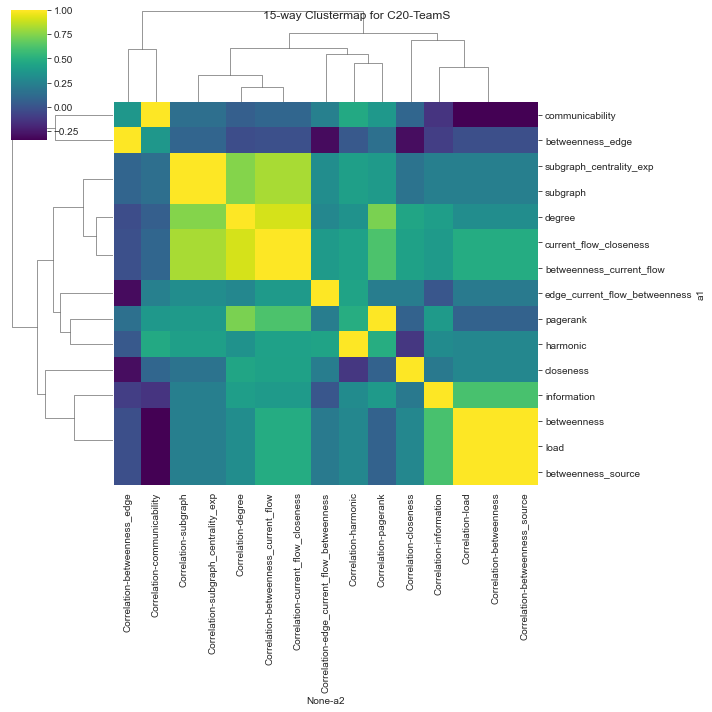

In [59]:
# Corr is still not working :(
data = []
for algo1, algo2 in itertools.product(df[team_name].columns, repeat=2):
    data.append((algo1, algo2, df[team_name][algo1].corr(df[team_name][algo2], method="spearman")))

df_corr = pd.DataFrame.from_records(data, columns=["a1", "a2", "Correlation"])\
    .set_index(["a1", "a2"])\
    .unstack()\
    .sort_index(level=0, ascending=False)

sns.set_style("darkgrid")
sns.color_palette("crest", as_cmap=True)
ax = sns.clustermap(df_corr, cmap="viridis")\
    .fig.suptitle("{}-way Clustermap for {}".format(len(df[team_name].columns), team_name))